# Importation des bibiliothèques nécessaires

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Chargement du dataset Iris

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# Charger le dataset
iris = load_iris()

# Variables explicatives (features)
X = iris.data  # shape (150, 4)

# Variable cible (labels)
y = iris.target  # 0: Setosa, 1: Versicolor, 2: Virginica

# Vérification rapide
print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)

Dimensions de X : (150, 4)
Dimensions de y : (150,)


# Implémentation de la fonction de coût Logistique


### Fonction sigmoïde


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


### Fonction de coût logistique (Cross-Entropy)

In [ ]:
def logistic_loss(y_true, y_pred):

    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

### Boucle qui un echantillon aléatoire à chaque itération

#### préparation du dataset

In [ ]:
y_binary = (y == 0).astype(int)  # 1 si Setosa, 0 sinon

# ajout du biais du modèle
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

#### Initialisation des poids

In [ ]:
np.random.seed(42)
w = np.random.randn(X_bias.shape[1])

learning_rate = 0.01
n_iterations = 200

### Boucle

In [ ]:
losses = []

for iteration in range(n_iterations):

    # Tirage aléatoire d'une observation
    i = np.random.randint(0, X_bias.shape[0])
    x_i = X_bias[i]
    y_i = y_binary[i]

    # Prédiction
    z = np.dot(x_i, w)
    y_pred = sigmoid(z)

    # Calcul de la perte
    loss = logistic_loss(y_i, y_pred)
    losses.append(loss)

    # Calcul du gradient
    gradient = (y_pred - y_i) * x_i

    # Mise à jour des poids
    w = w - learning_rate * gradient

### La courbe de coût

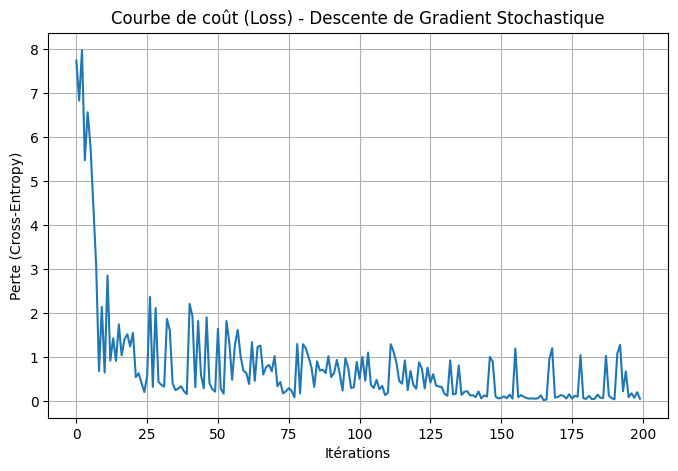

In [ ]:
# Convertir losses en array
losses_array = np.array(losses)

# Tracé de la courbe
plt.figure(figsize=(8,5))
plt.plot(losses_array)
plt.title("Courbe de coût (Loss) - Descente de Gradient Stochastique")
plt.xlabel("Itérations")
plt.ylabel("Perte (Cross-Entropy)")
plt.grid(True)
plt.show()

La courbe de coût du SGD est très instable car chaque mise à jour ne se fait qu’avec une seule observation aléatoire, ce qui rend le gradient bruyant. Contrairement à la descente de gradient classique qui utilise tout le dataset pour calculer un gradient exact, le SGD présente des fluctuations importantes, même si la tendance générale de la perte est à la baisse et permet au modèle de converger.

# Partie2:Régression sur California Housing (Le Passage à l’Échelle)

### Chargement des données

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import time

In [ ]:
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

print("Shape de X :", X.shape)
print("Shape de y :", y.shape)

Shape de X : (20640, 8)
Shape de y : (20640,)


### Entrainements du modèle SGDregressor sur la base brute

In [ ]:
# Ajouter le biais (colonne de 1)
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

# Séparer train/test
X_train, X_test, y_train, y_test = train_test_split(X_bias, y, test_size=0.2, random_state=42)

# Initialisation des poids aléatoires
np.random.seed(42)
w = np.random.randn(X_train.shape[1])

# Paramètres SGD
learning_rate1 = 0.01
n_iterations1 = 3000

# Liste pour stocker les pertes
losses = []

start = time.time()
# Boucle SGD
for iteration in range(n_iterations1):
    i = np.random.randint(0, X_train.shape[0])
    x_i = X_train[i]
    y_i = y_train[i]

    # Prédiction
    y_pred = np.dot(x_i, w)

    # Calcul du gradient
    gradient = (y_pred - y_i) * x_i

    # Mise à jour des poids
    w = w - learning_rate1 * gradient

    # Stocker la perte
    loss = 0.5 * (y_pred - y_i)**2
    losses.append(loss)

end = time.time()
print("Temps total sur données brutes :", end - start, "secondes")

# Évaluer sur le test set
y_test_pred = np.dot(X_test, w)
mse = mean_squared_error(y_test, y_test_pred)
print("MSE sur données brutes :", mse)

Temps total sur données brutes : 0.15062642097473145 secondes


/tmp/ipython-input-2920037819.py:35: RuntimeWarning: overflow encountered in scalar power
  loss = 0.5 * (y_pred - y_i)**2
/tmp/ipython-input-2920037819.py:32: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate1 * gradient


ValueError: Input contains NaN.

### StandardScaler pour normaliser les données et ré-entraînnement du modèle

In [ ]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajouter le biais
X_scaled_bias = np.hstack((np.ones((X_scaled.shape[0],1)), X_scaled))

# Séparer train/test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled_bias, y, test_size=0.2, random_state=42)

# Réinitialisation des poids
np.random.seed(42)
w = np.random.randn(X_train1.shape[1])

# Paramètres SGD
learning_rate2 = 0.01  # plus grand que pour les données brutes
n_iterations2 = 3000

# Liste pour stocker les pertes
losses_scaled = []

start_std = time.time()
# Boucle SGD
for iteration in range(n_iterations2):
    i = np.random.randint(0, X_train.shape[0])
    x_i = X_train1[i]
    y_i = y_train1[i]

    # Prédiction
    y_pred = np.dot(x_i, w)

    # Calcul du gradient
    gradient = (y_pred - y_i) * x_i

    # Mise à jour des poids
    w = w - learning_rate2 * gradient

    # Stocker la perte
    loss2 = 0.5 * (y_pred - y_i)**2
    losses_scaled.append(loss2)

end_std = time.time()
print("Temps total sur données standardisées :", end_std - start_std, "secondes")

# Évaluer sur le test set
y_test_pred = np.dot(X_test, w)
mse_scaled = mean_squared_error(y_test, y_test_pred)
print("MSE sur données standardisées :", mse_scaled)


Temps total sur données standardisées : 0.03497052192687988 secondes
MSE sur données standardisées : 13.028290522186175


### Visualisation

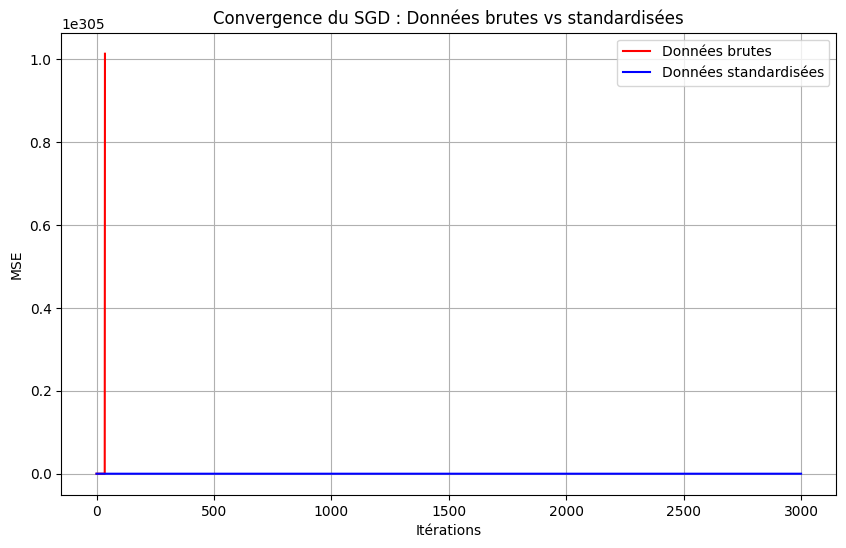

In [ ]:
plt.figure(figsize=(10,6))

# Courbe SGD sur données brutes
plt.plot(losses, label="Données brutes", color='red')

# Courbe SGD sur données standardisées
plt.plot(losses_scaled, label="Données standardisées", color='blue')

plt.title("Convergence du SGD : Données brutes vs standardisées")
plt.xlabel("Itérations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

# Mini-batch et Optimiseurs Modernes

In [ ]:
# Paramètres
n_iterations3 = 300
learning_rate3 = 0.01
batch_size_minibatch = 32
np.random.seed(42)

### SGD Pur (batch_size = 1)

In [ ]:
w_sgd = np.random.randn(X_train1.shape[1])
losses_sgd = []

for it in range(n_iterations3):
    i = np.random.randint(0, X_train1.shape[0])
    x_i = X_train1[i]
    y_i = y_train1[i]

    y_pred = np.dot(x_i, w_sgd)
    gradient3 = (y_pred - y_i) * x_i
    w_sgd -= learning_rate3 * gradient3

    losses_sgd.append(0.5*(y_pred - y_i)**2)


### Mini-batch SGD (batch_size = 32)

In [ ]:
w_mb = np.random.randn(X_train.shape[1])
losses_mb = []

for it in range(n_iterations3):
    idx = np.random.choice(X_train.shape[0], batch_size_minibatch, replace=False)
    X_batch = X_train[idx]
    y_batch = y_train[idx]

    y_pred_batch = X_batch @ w_mb
    gradient4 = np.mean((y_pred_batch - y_batch)[:, None] * X_batch, axis=0)
    w_mb -= learning_rate3 * gradient4

    # perte sur le batch
    losses_mb.append(np.mean(0.5*(y_pred_batch - y_batch)**2))

### ADAM

In [ ]:
w_adam = np.random.randn(X_train.shape[1])
losses_adam = []

beta1, beta2 = 0.9, 0.999
eps = 1e-8
m, v = np.zeros_like(w_adam), np.zeros_like(w_adam)

for it in range(1, n_iterations+1):
    i = np.random.randint(0, X_train.shape[0])
    x_i = X_train[i]
    y_i = y_train[i]

    y_pred = np.dot(x_i, w_adam)
    grad = (y_pred - y_i) * x_i

    # Moments
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad**2)

    # Correction biais
    m_hat = m / (1 - beta1**it)
    v_hat = v / (1 - beta2**it)

    # Mise à jour des poids
    w_adam -= learning_rate * m_hat / (np.sqrt(v_hat) + eps)

    losses_adam.append(0.5*(y_pred - y_i)**2)